UK MONETARY POLICY 2019-2025 Data_Visualisation

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [18]:
import os
current_dir = os.getcwd()
current_dir

'\\\\talktalk\\redirectedfolders\\F.Afolabi\\Documents\\VSCode1\\UK_MonetaryPolicy_2019\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [19]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [22]:
current_dir = os.getcwd()
current_dir

'\\\\talktalk\\redirectedfolders\\F.Afolabi\\Documents\\VSCode1\\UK_MonetaryPolicy_2019'

# Section 1

Section 1 content

---

Section 2 content

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ploty.express as px


In [34]:
final_df = pd.read_csv("./Dataset/Cleaned/final_df.csv")

In [57]:
print(final_df.head())

     Date  GDP_Level  Bank_Rate  CPI_Inflation
0  2019Q1   665456.0   0.750000          107.8
1  2019Q2   666875.0   0.750000          107.8
2  2019Q3   670547.0   0.750000          107.8
3  2019Q4   670587.0   0.750000          107.8
4  2020Q1   652180.0   0.611719          108.7


Ploting Bank Rate versus Inflation (CPI)

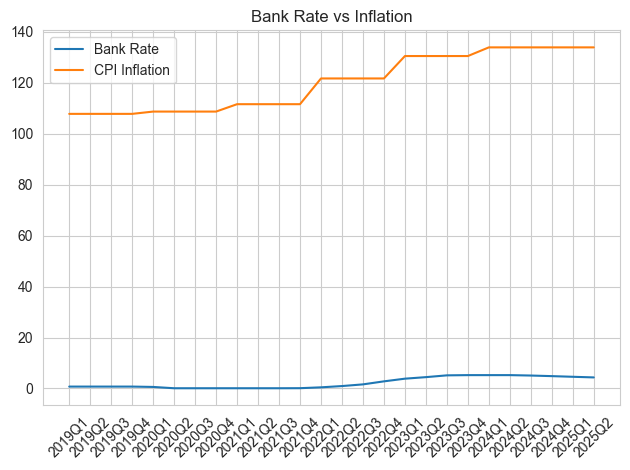

In [58]:
plt.figure()
plt.plot(final_df['Date'].astype(str), final_df['Bank_Rate'], label='Bank Rate')
plt.plot(final_df['Date'].astype(str), final_df['CPI_Inflation'], label='CPI Inflation')
plt.xticks(rotation=45)
plt.title("Bank Rate vs Inflation")
plt.legend()
plt.tight_layout()
plt.show()

The chart illustrates the relationship between the Bank of England’s policy interest rate (Bank Rate) and Consumer Price Index (CPI) inflation on a quarterly basis between 2019 and 2025.

From 2019 to 2021, both the Bank Rate and inflation remained relatively low and stable. During this period, the Bank Rate was held close to zero, reflecting an accommodative monetary policy stance aimed at supporting economic activity following Brexit uncertainty and the COVID-19 shock.
From 2021; sharp increase in inflation was observed with CPI rising significantly through 2022 and into 2023. In response, the Bank of England progressively increased the policy interest rate.

---

Bank Rate impacts Inflation (CPI) using subplots

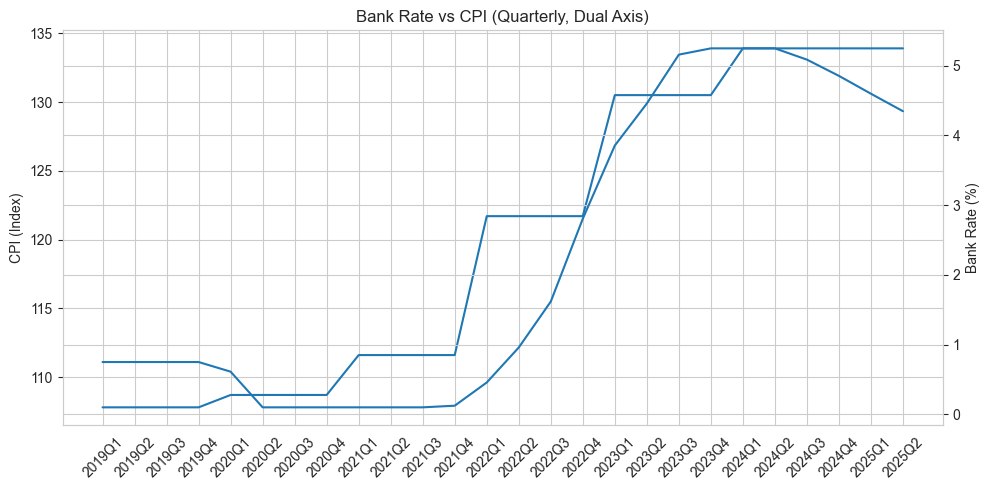

In [ ]:
df = final_df.sort_values('Date').copy() # Sorting by Date to ensure correct plotting
x = df['Date'].astype(str)  # Converting Date to string for better x-axis representation

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(x, df['CPI_Inflation'])
ax1.set_ylabel("CPI (Index)")
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(x, df['Bank_Rate'])
ax2.set_ylabel("Bank Rate (%)")

ax1.set_title("Bank Rate vs CPI (Quarterly, Dual Axis)")
fig.tight_layout()
plt.show()

The graphs shows that Inflation rises first and the Bank Rate increases afterward, consistent with policy reacting to inflation and affecting it with a lag.

Interest Rate VS CPI Using Scatter Diagram

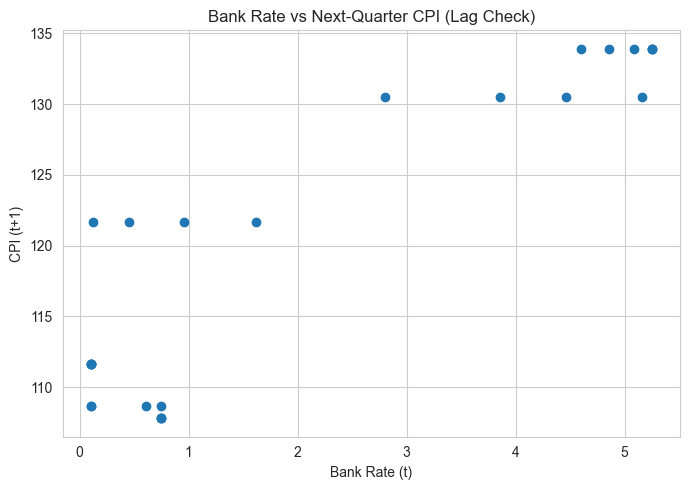

In [60]:
df = df.copy()
df['CPI_nextQ'] = df['CPI_Inflation'].shift(-1)

plt.figure(figsize=(7,5))
plt.scatter(df['Bank_Rate'], df['CPI_nextQ'])
plt.xlabel("Bank Rate (t)")
plt.ylabel("CPI (t+1)")
plt.title("Bank Rate vs Next-Quarter CPI (Lag Check)")
plt.tight_layout()
plt.show()

This checks whether higher rates today are associated with lower inflation in the following quarter. 

Ploting Interest Rate vs GDP; 

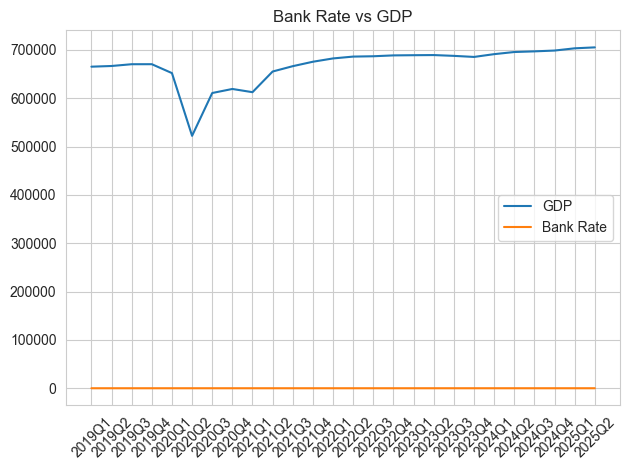

In [61]:
plt.figure()
plt.plot(final_df['Date'].astype(str), final_df['GDP_Level'], label='GDP')
plt.plot(final_df['Date'].astype(str), final_df['Bank_Rate'], label='Bank Rate')
plt.xticks(rotation=45)
plt.title("Bank Rate vs GDP")
plt.legend()
plt.tight_layout()
plt.show()

NOTE

Ploting Interest Rate VS  GDP using subplots

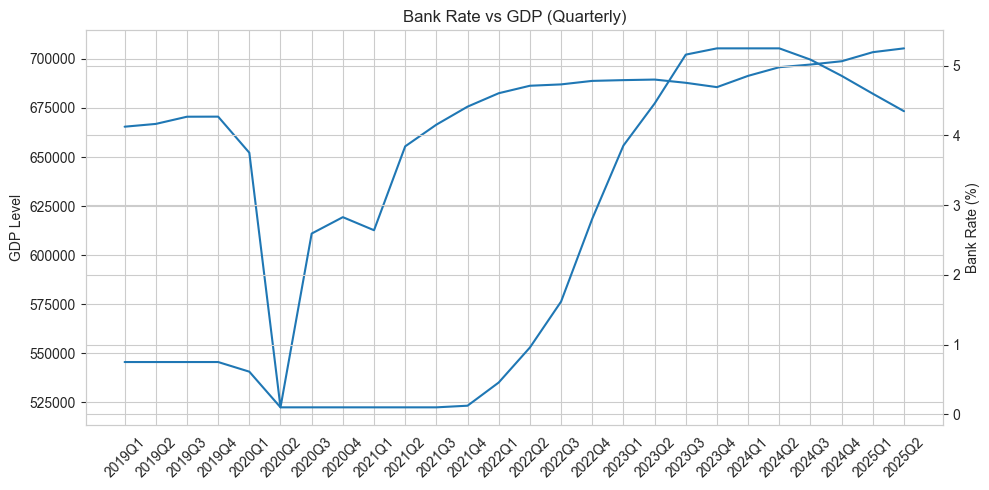

In [62]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# GDP (left axis)
ax1.plot(final_df['Date'].astype(str), final_df['GDP_Level'], label='GDP')
ax1.set_ylabel('GDP Level')
ax1.tick_params(axis='x', rotation=45)

# Bank Rate (right axis)
ax2 = ax1.twinx()
ax2.plot(final_df['Date'].astype(str), final_df['Bank_Rate'], label='Bank Rate')
ax2.set_ylabel('Bank Rate (%)')

# Title
ax1.set_title("Bank Rate vs GDP (Quarterly)")

fig.tight_layout()
plt.show()

The graph  illustrates the relationship between the Bank of England’s policy rate and GDP on a quarterly basis. A dual-axis plot is used to account for differences in scale. The sharp decline in GDP during 2020 reflects the COVID-19 shock, followed by a gradual recovery. Periods of higher interest rates coincide with slower GDP growth, supporting the hypothesis that tighter monetary policy may dampen economic activity.

Ploting Inflation vs GDP (Trade-off)

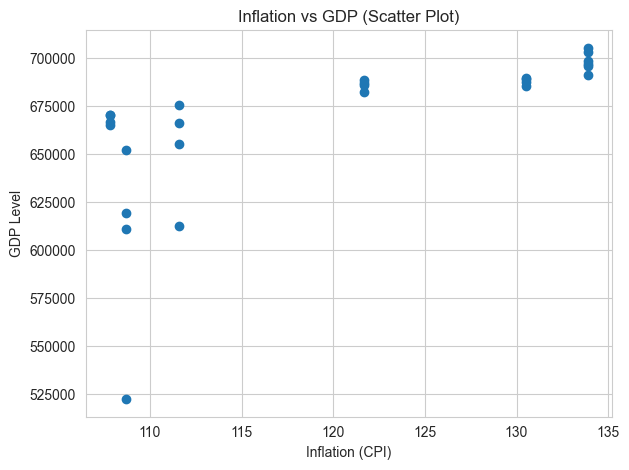

In [69]:
plt.figure()
plt.scatter(final_df['CPI_Inflation'], final_df['GDP_Level'])
plt.xlabel("Inflation (CPI)")
plt.ylabel("GDP Level")
plt.title("Inflation vs GDP (Scatter Plot)")
plt.tight_layout()
plt.show()

The scatter plot illustrates the relationship between quarterly inflation (measured by the Consumer Price Index, CPI) and Gross Domestic Product (GDP) in the UK over the period 2019–2025.

Contrary to the traditional macroeconomic expectation of a trade-off between inflation and economic output, the plot does not show a strong negative relationship between CPI and GDP. Instead, higher inflation values are generally associated with higher levels of GDP, particularly during the post-pandemic recovery period from 2021 onwards.

VALIDATION SUMMARY

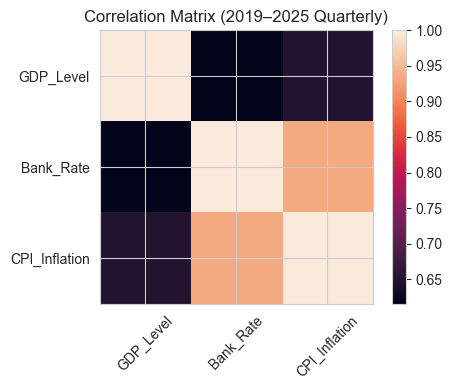

In [70]:
corr = final_df[['GDP_Level','Bank_Rate','CPI_Inflation']].corr()

plt.figure(figsize=(5,4))
plt.imshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix (2019–2025 Quarterly)")
plt.colorbar()
plt.tight_layout()
plt.show()

Correlation matrix: Summarises linear relationships, complementing the time-series plots 

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [71]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)